### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()

### Import dataset

In [2]:
data = pd.read_csv('mktmix.csv')
data.head()

,NewVolSales,Base_Price,Radio,InStore,NewspaperInserts,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,NaN,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,NaN,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,NaN,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,NaN,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,NaN,0.045,103.438118,1.81860,NaN


In [3]:
data.shape

(104, 9)

In [4]:
data.isnull().sum()

NewVolSales           0
Base_Price            0
Radio                 4
InStore               0
NewspaperInserts     98
Discount              0
TV                    0
Stout                 0
Website_Campaign     90
dtype: int64

In [5]:
data.iloc[:,-1].value_counts()

Website Campaign     6
Facebook             4
Twitter              4
Name: Website_Campaign , dtype: int64

In [6]:
data.iloc[:,4].value_counts()

Insert    6
Name: NewspaperInserts, dtype: int64

### Handeling missing values

In [7]:
data.drop(['NewspaperInserts'], axis=1,inplace=True)

In [8]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout,Website_Campaign
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342,NaN
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134,NaN
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604,NaN
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897,NaN
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860,NaN


In [9]:
data.columns

Index(['NewVolSales', 'Base_Price', 'Radio ', 'InStore', 'Discount', 'TV',
       'Stout', 'Website_Campaign '],
      dtype='object')

In [10]:
data.drop(['Website_Campaign '],axis=1,inplace=True)
### In both the columns 'NewspaperInserts'&'Website_Campaign' max features are missing so we drop them.

In [11]:
data.head()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
0,19564,15.029276,245.0,15.452,0.000,101.780000,2.28342
1,19387,15.029276,314.0,16.388,0.000,76.734000,2.22134
2,23889,14.585093,324.0,62.692,0.050,131.590200,2.00604
3,20055,15.332887,298.0,16.573,0.000,119.627060,2.19897
4,20064,15.642632,279.0,41.504,0.045,103.438118,1.81860


In [12]:
### Now we have a feature 'Radio' which has 4 missing value so we replace with mean.
data['Radio '].mean()
data['Radio '].fillna(data['Radio '].mean(), inplace=True)

In [13]:
data.isnull().sum()

NewVolSales    0
Base_Price     0
Radio          0
InStore        0
Discount       0
TV             0
Stout          0
dtype: int64

In [14]:
### Now we don't have any missing values so we can move ahed

In [15]:
data.corr()

,NewVolSales,Base_Price,Radio,InStore,Discount,TV,Stout
NewVolSales,1.000000,-0.729258,0.046524,0.441627,0.424761,0.145308,-0.375905
Base_Price,-0.729258,1.000000,-0.000039,-0.230751,-0.189975,0.065872,-0.027607
Radio,0.046524,-0.000039,1.000000,-0.017812,0.112135,-0.061887,-0.185066
InStore,0.441627,-0.230751,-0.017812,1.000000,0.719376,-0.015759,0.025108
Discount,0.424761,-0.189975,0.112135,0.719376,1.000000,0.115074,-0.025555
TV,0.145308,0.065872,-0.061887,-0.015759,0.115074,1.000000,-0.126546
Stout,-0.375905,-0.027607,-0.185066,0.025108,-0.025555,-0.126546,1.000000


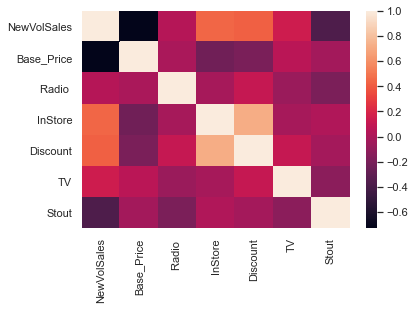

In [16]:
sns.heatmap(data.corr())

### Split the data

In [17]:
X = data.iloc[:,1:].values
y = data.iloc[:,0].values

In [18]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

In [19]:
X_train,X_test,y_train,y_test = train_test_split(X,y, test_size=0.25,random_state=42 )

In [20]:
X_train.he

array([[1.57998430e+01, 2.50000000e+02, 3.19370000e+01, 0.00000000e+00,
        1.30225475e+02, 2.20692000e+00],
       [1.59586340e+01, 3.13000000e+02, 3.36140000e+01, 4.08418220e-02,
        1.33989117e+02, 2.41451000e+00],
       [1.62810198e+01, 2.76000000e+02, 2.66020000e+01, 0.00000000e+00,
        1.18634630e+02, 2.64806000e+00],
       [1.54869851e+01, 3.18000000e+02, 2.72720000e+01, 4.50000000e-02,
        1.87448232e+02, 2.44064000e+00],
       [1.51803222e+01, 2.12000000e+02, 1.83870000e+01, 0.00000000e+00,
        3.76561745e+01, 2.89872000e+00],
       [1.59586340e+01, 3.30000000e+02, 3.68180000e+01, 6.50000000e-02,
        1.81083341e+02, 2.27081000e+00],
       [1.62810198e+01, 2.56690000e+02, 4.61690000e+01, 6.05349600e-02,
        1.62128223e+02, 2.66790000e+00],
       [1.45850933e+01, 2.50000000e+02, 6.81190000e+01, 7.73041590e-02,
        4.86145137e+01, 2.51717000e+00],
       [1.53328870e+01, 3.15000000e+02, 1.31180000e+01, 0.00000000e+00,
        8.32393053e+01, 

In [21]:
y_train.shape

(78,)

### Create & train the model

In [22]:
from sklearn.ensemble import RandomForestRegressor
regressor = RandomForestRegressor(n_estimators = 10, random_state = 0)
regressor.fit(X_train, y_train)
regressor.get_params()

{'bootstrap': True,
 'ccp_alpha': 0.0,
 'criterion': 'mse',
 'max_depth': None,
 'max_features': 'auto',
 'max_leaf_nodes': None,
 'max_samples': None,
 'min_impurity_decrease': 0.0,
 'min_impurity_split': None,
 'min_samples_leaf': 1,
 'min_samples_split': 2,
 'min_weight_fraction_leaf': 0.0,
 'n_estimators': 10,
 'n_jobs': None,
 'oob_score': False,
 'random_state': 0,
 'verbose': 0,
 'warm_start': False}

### Predicting a new result

In [23]:
y_pred = regressor.predict(X_test)

In [24]:
y_test

array([20538, 18779, 20153, 18667, 19953, 18941, 17431, 22730, 18755,
       19564, 22228, 21034, 20204, 18289, 19400, 20064, 19529, 19597,
       18473, 24219, 19126, 20988, 21139, 21710, 20442, 22767],
      dtype=int64)

In [25]:
y_pred

array([20047.9, 19071.4, 19314.8, 18683.5, 19610.9, 19248.7, 19456.4,
       23083.2, 20166.5, 20013. , 21776.9, 20039.6, 23046.6, 19663.4,
       21610.2, 20343.4, 20855.1, 19019.2, 19781.2, 23770.5, 19263.2,
       20929.4, 20539.8, 22081.7, 19651.3, 23664. ])

In [26]:
from sklearn.metrics import r2_score
r2_score(y_test,y_pred)

0.5304360131856622